# Question 1
1. Learn and understand Zipf’s Law.
2. Pick any file (or files) in NLTK package.
3. Prove if Zipf’s Law works in Natural Language or not.
4. REQUIREMNTS: (Must Do)
   * Use ’glob’ to open and read file. If read multiple files use LOOP to achieve.
   * Create at least one function and one lambda function.
   * Save your data as an CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK. 
   * Open your CSV file, * generate a log-log figure according to the data you saved.
   * Write a conclusion at the end of your code base on your figure.

In [4]:
import glob
import string

In [2]:
def read_file(filename):
    f = open(filename,encoding = "ISO-8859-1")
    lines = f.read()              #convert file into a single string
    exclude = set(string.punctuation) #remove punctuation
    lines = ''.join(ch for ch in lines if ch not in exclude)
    word_list = lines.split()     #convert string to word list
    word_list =[word.lower() for word in word_list]  #lowercase the words
    return word_list

In [5]:
word_list = [];
for filename in glob.glob('/Users/fangninghe/nltk_data/corpora/inaugural/*txt'):
    word_list.extend(read_file(filename))             #read all files and put into one list

In [6]:
print(word_list[:10])

['fellowcitizens', 'of', 'the', 'senate', 'and', 'of', 'the', 'house', 'of', 'representatives']


In [7]:
import collections
word_dict = dict(collections.Counter(word_list)) #convert into frequency dictionary

In [8]:
sorted_dict = sorted(word_dict.items(), key=lambda item: item[1], reverse = True) #use lambda to grap the key in dict

In [10]:
sorted_list = []
a = 1
for item in sorted_dict:
    item = list(item)
    item.insert(0,a)
    a = a +1
    sorted_list.append(item)          #add rank column to sorted list

In [13]:
import csv

with open("output.csv", "w",newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Rank','Word','Frequency']) # add headers
    writer.writerows(sorted_list)  #generate csv file

## log-log plot in csv file:
!['log-log in csv'](zipf`s_law.png)

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
del sorted_list[0] #delete titles

In [17]:
x = []
y = []
for item in sorted_list:
    x.append(item[0])
    y.append(item[2])  #grap rank and frequency

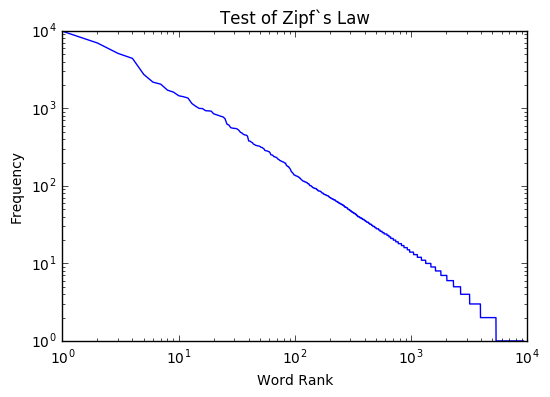

In [18]:
plt.loglog(x, y)              #generate log-log plot
plt.xlabel("Word Rank")
plt.ylabel("Frequency")
plt.title("Test of Zipf`s Law")

plt.show()

# Conclusion
**According to the log-log plot, the word frequencies in presidents speehes are comlplied with Zipf's Law which is that the frequency of any word is inversely proportional to its rank in the frequency table.**